In [38]:
#Author Anna Durbanova
#Theme: Life Expectancy
#Date 16.08.2020

import pandas as pd
import numpy as np
import seaborn as sns
import  pingouin as pg
import matplotlib.pyplot as plt
import hvplot as hv
from hvplot import hvPlot
import hvplot.pandas
import holoviews
import difflib as dfl
from functools import partial
%matplotlib inline

# Information about our data

In [40]:
data=pd.read_csv("Life Expectancy Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Description of each column


|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|

In [39]:
data["Income composition of resources"].replace(0.0, np.nan, inplace=True)
data["Schooling"].replace(0.0, np.nan, inplace=True)
data.sort_values(["Country", "Year"], inplace=True)
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Compare Status
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,...,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5,False
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,...,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9,True
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,...,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2,True
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,...,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5,True
11,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,...,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1,True
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8,True
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4,True
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3,True


# Life Expectancy Overview for All countries for 2015

In [7]:
data_2015=(data[data.Year==2015]
    .groupby("Country")
    ["Country", "Life expectancy "]
    .median()
    .sort_values(by="Life expectancy ", ascending=False))

data_2015.reset_index().hvplot.bar(x="Country", y="Life expectancy ", rot=90,width=2000, height=550, title = "Life Expectancy for ALL Countries for 2015")

<ipython-input-7-20470f3db1df>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2015=(data[data.Year==2015]


:Bars   [Country]   (Life expectancy )

# The Effect of different factors on the Life Expectancy

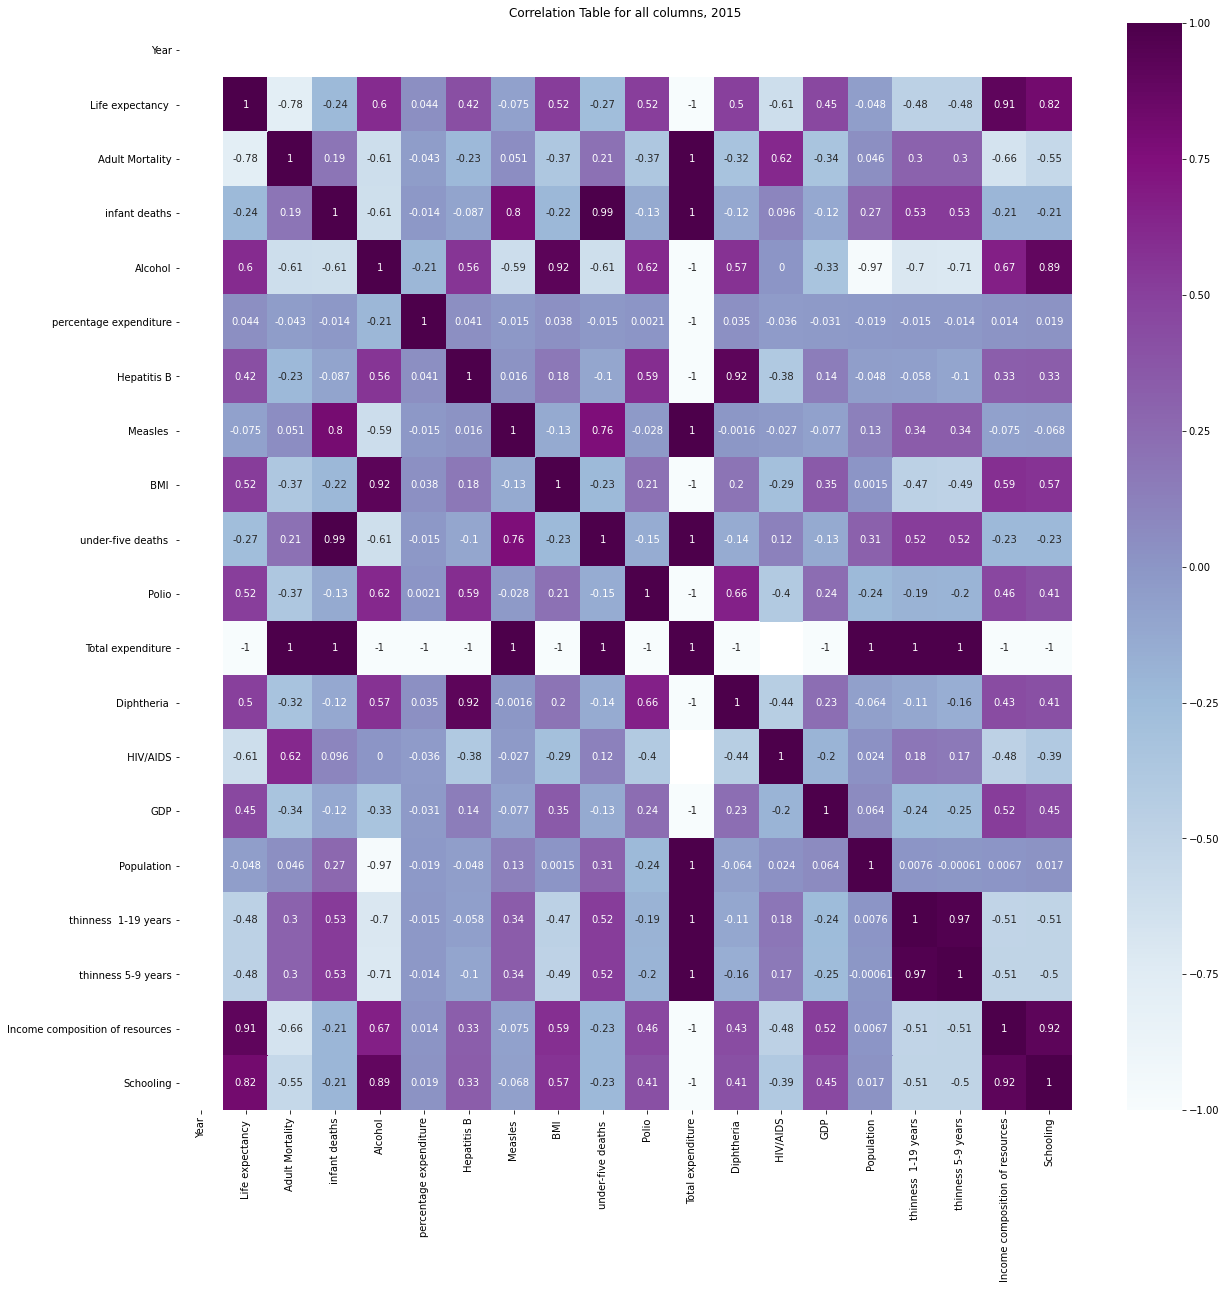

In [41]:
mask = data.Year==2015
plt.rcParams["figure.figsize"]=(20,20)
sns.heatmap(data[mask].corr(), cmap="BuPu", annot=True).set_title("Correlation Table for all columns, 2015");

## Correlation between values  - Statistically Significance - with p-value

- Life Expectancy & Income Composition of Resources
- Life Expectancy & Schooling
- Under 5 Years & Infant Deaths
- Alcohol & Hepatitis B
- Polio & Diphtheria
- Total Expenditure & Population
- Schooling & GDP


### Life Expectancy & Income Composition of Resources


In [9]:
pg.corr(data["Life expectancy "], data["Income composition of resources"])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,2638,0.888599,"[0.88, 0.9]",0.789608,0.789449,0.0,inf,1.0


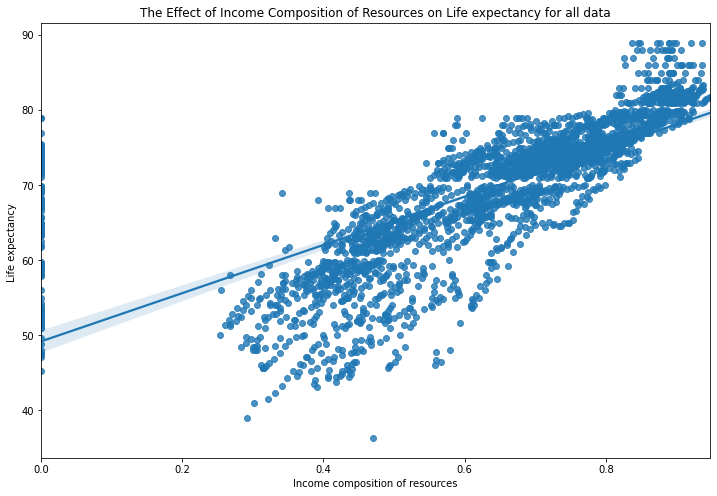

In [44]:
plt.rcParams["figure.figsize"]=(12,8)
sns.regplot(x="Income composition of resources", y="Life expectancy ", data=data).set_title("The Effect of Income Composition of Resources on Life expectancy for all data");

Correlation between Income composition of Resources and Life Expectancy, taking into account all countries for all years. 

We can clearly see that there is a positive correlation and more income composition of resource the country has, much longer the population expect to live

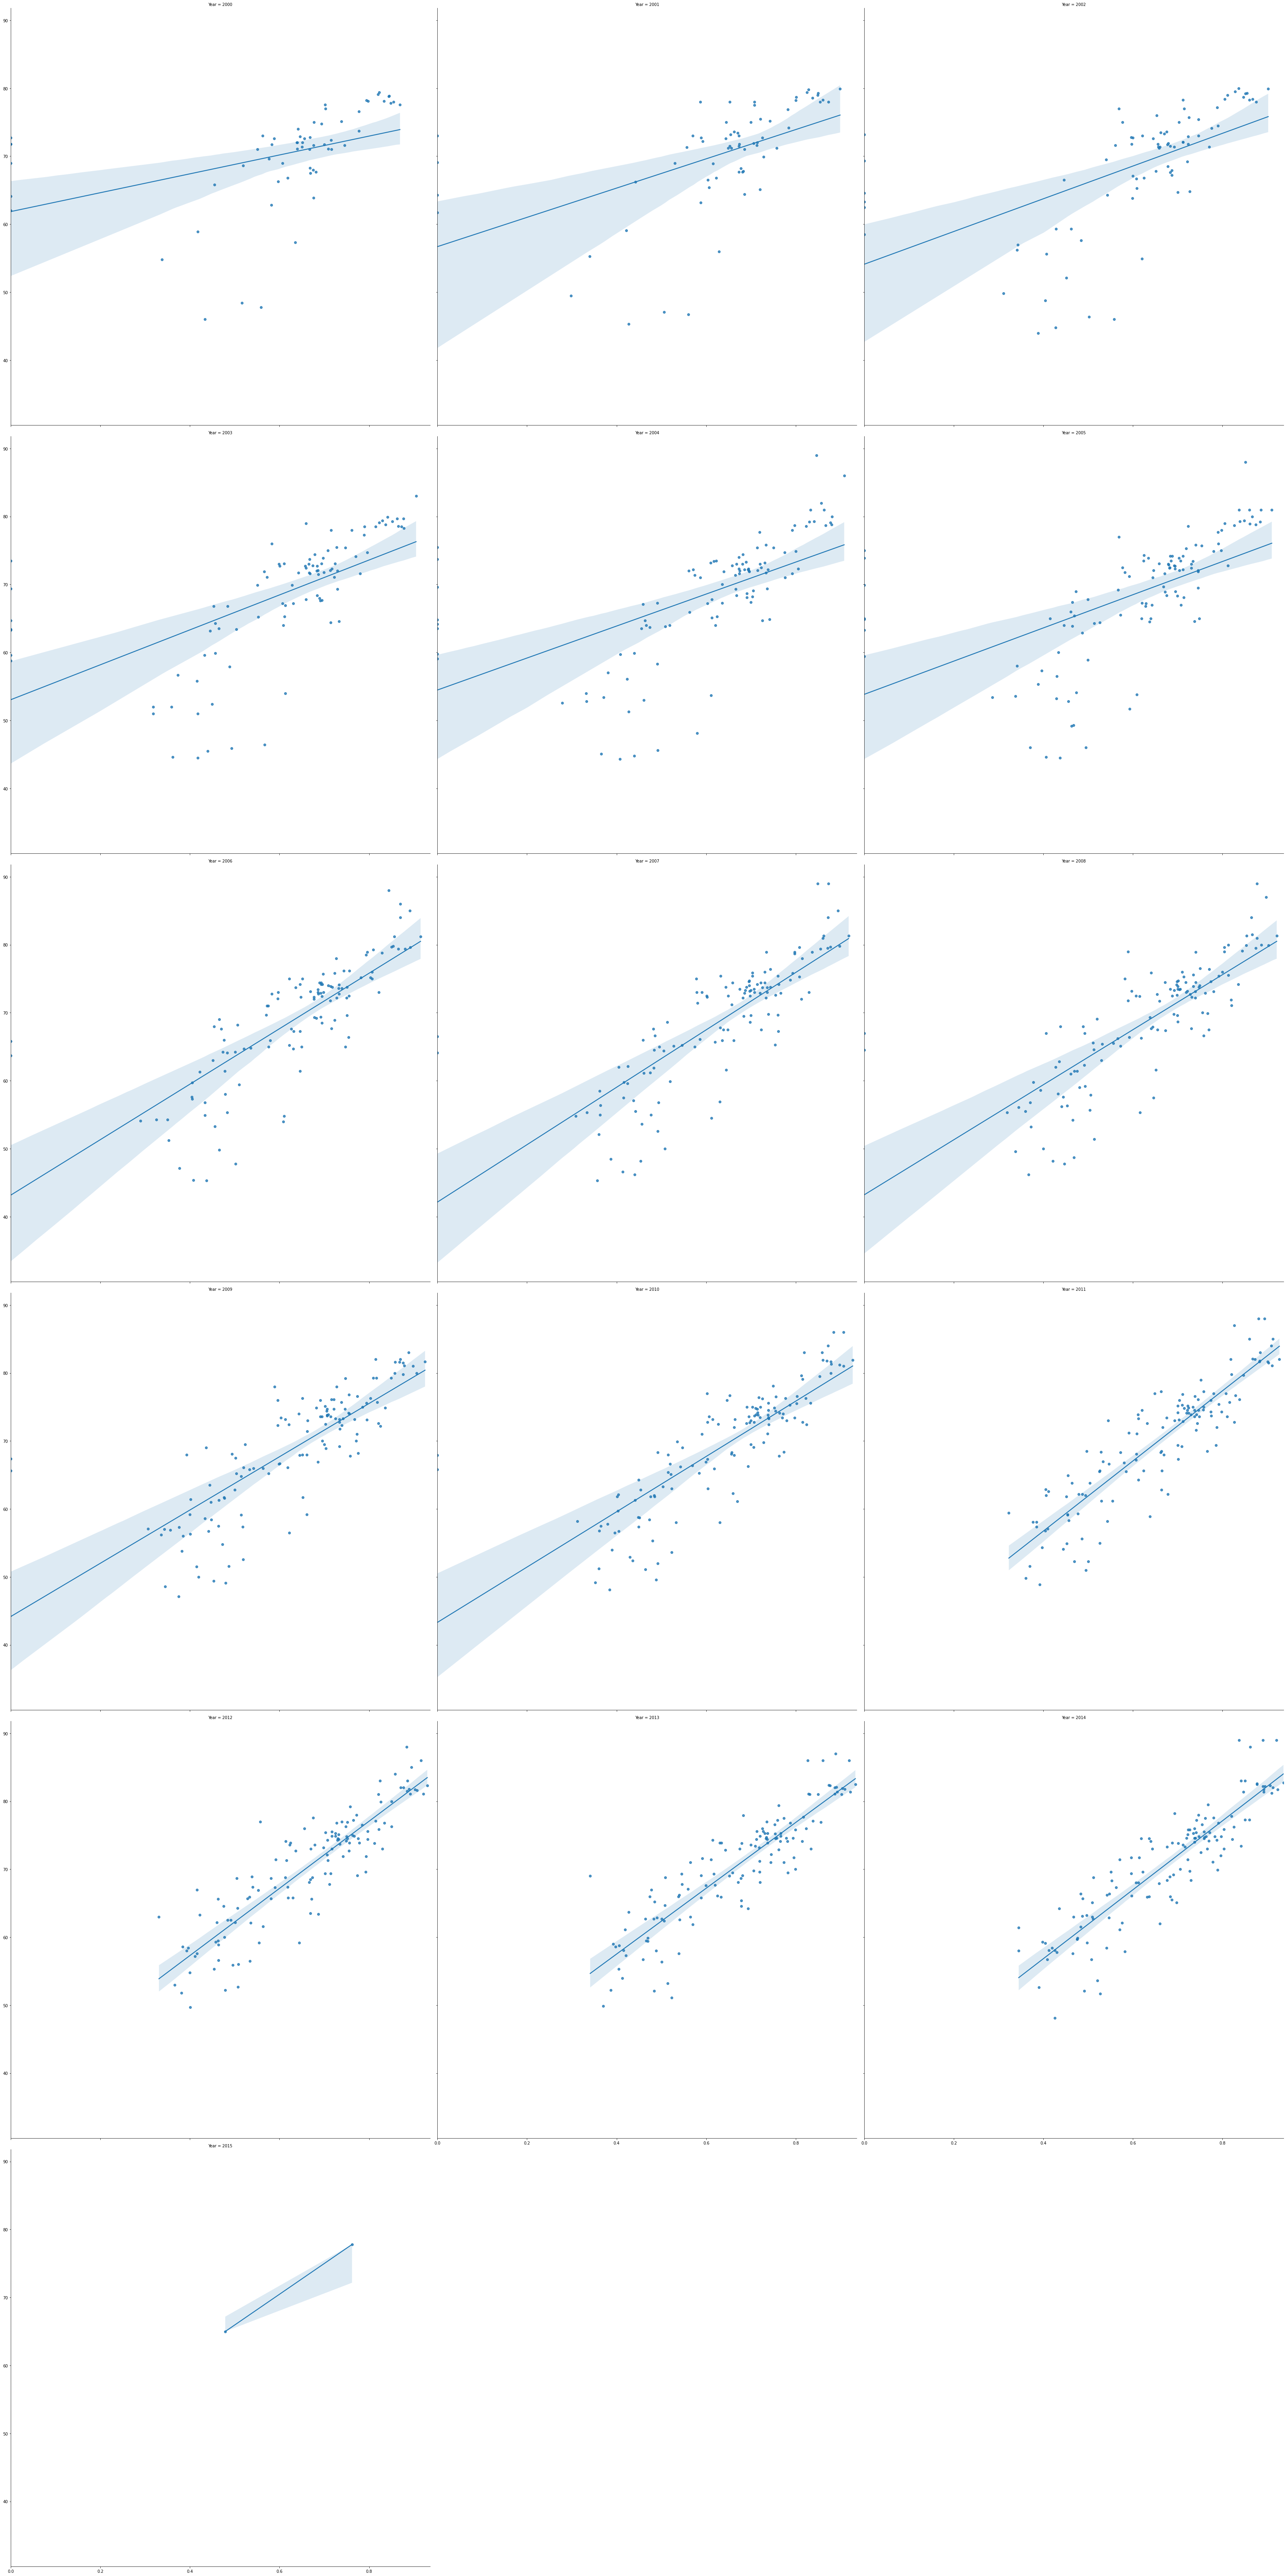

In [49]:
plt.rcParams["figure.figsize"]=(12,8)
g = sns.FacetGrid(data=data, col="Year", col_wrap=3, height=15)
g.map_dataframe(sns.regplot, x="Income composition of resources", y="Life expectancy ");

Correlation for Income composition of Resources for 15 years. We can see that it is a positive correlation

### Correlation between Schooling and Life Expectancy

In [12]:
pg.corr(data["Life expectancy "], data["Schooling"])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,2742,0.783514,"[0.77, 0.8]",0.613894,0.613612,0.0,inf,1.0


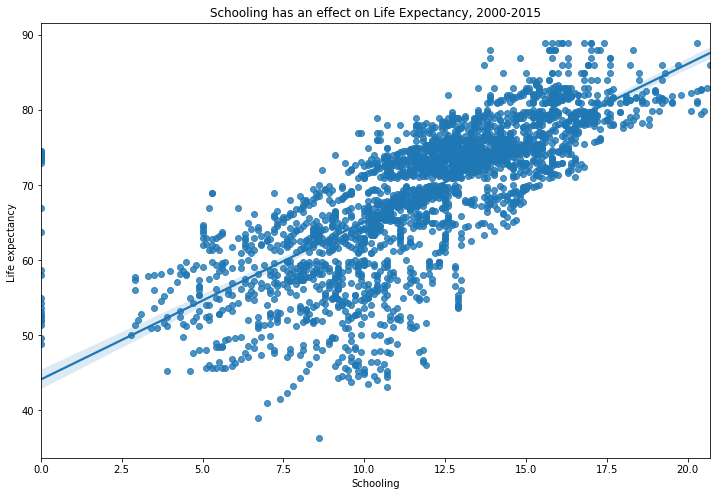

In [61]:
sns.regplot(x="Schooling", y="Life expectancy ", data=data).set_title("Schooling has an effect on Life Expectancy, 2000-2015");

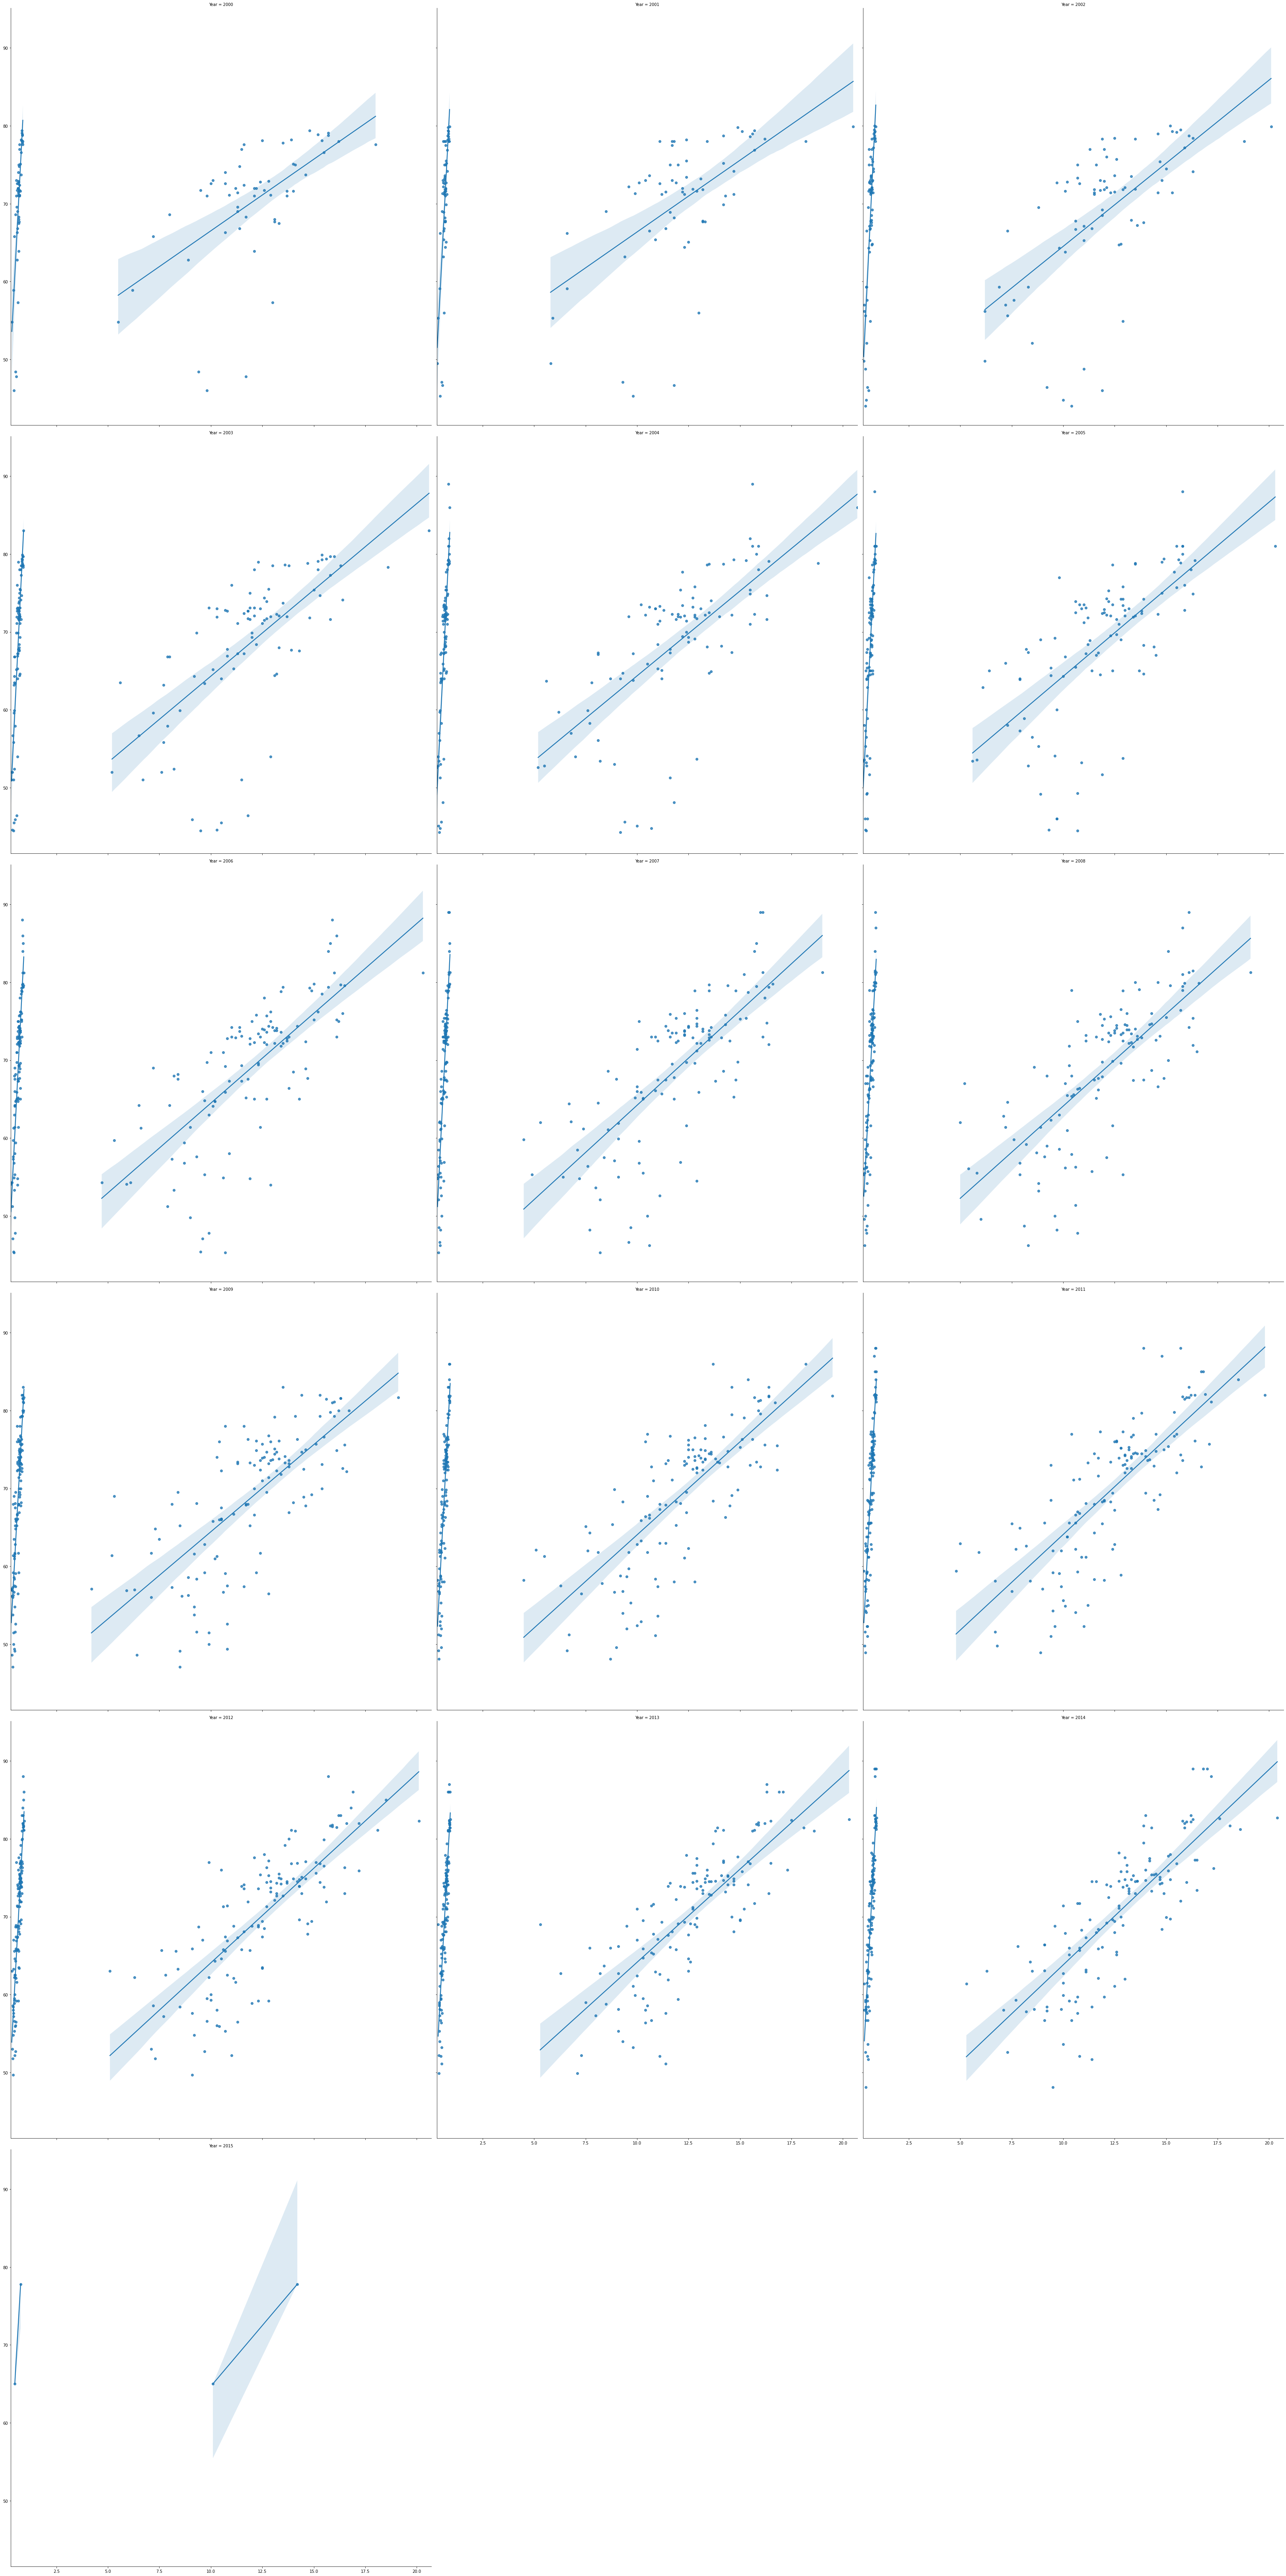

In [14]:
sns.FacetGrid(data=data,col="Year",col_wrap=4, height=20)
g.map_dataframe(sns.regplot,x="Schooling", y="Life expectancy ");

From the scatter plots we can see that schooling indeed has an effect on life expectancy

More years of schooling the person has, longer does he live

## 3. Correlation between Infant Deaths and Under-Five Deaths

In [15]:
pg.corr(data["under-five deaths "], data["infant deaths"])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,2938,0.996629,"[1.0, 1.0]",0.993269,0.993265,0.0,nan,1.0


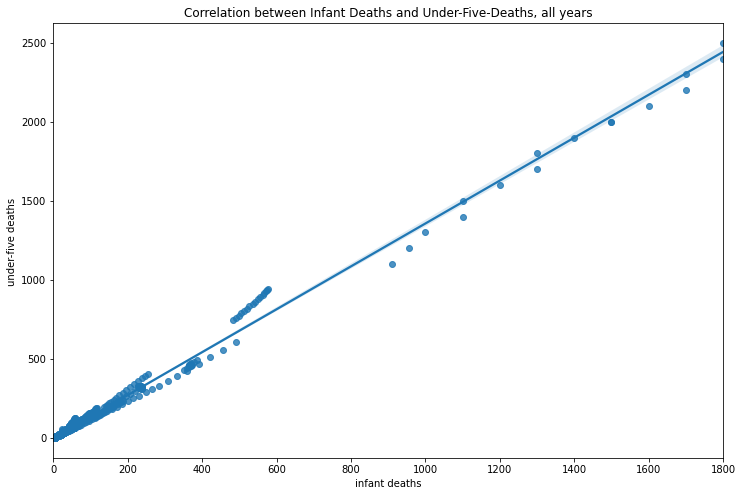

In [51]:
sns.regplot(data=data, x="infant deaths", y="under-five deaths ").set_title("Correlation between Infant Deaths and Under-Five-Deaths, all years");

Pretty obvious positive correlation: More infant deaths more under-five deaths.

## 4. Hepatitis B & Life Expectancy

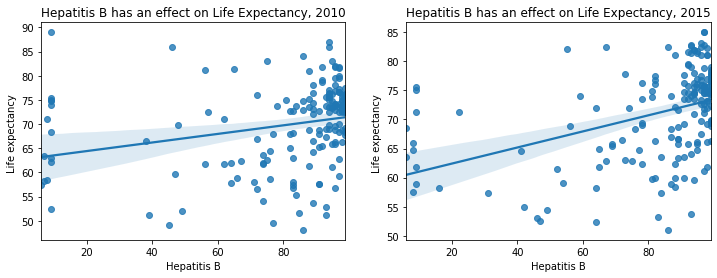

In [53]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=[12,4])
sns.regplot(data=data[data.Year == 2010], x="Hepatitis B", y="Life expectancy ", ax=ax1).set_title("Hepatitis B has an effect on Life Expectancy, 2010");
sns.regplot(data=data[data.Year == 2015], x="Hepatitis B", y="Life expectancy ", ax=ax2).set_title("Hepatitis B has an effect on Life Expectancy, 2015");

From 2000 - 2015 the correlation between Hepatitis B and Life Expectancy has been changing from flat to positive correlation

## 5. Polio & Diphtheria on Life expectancy

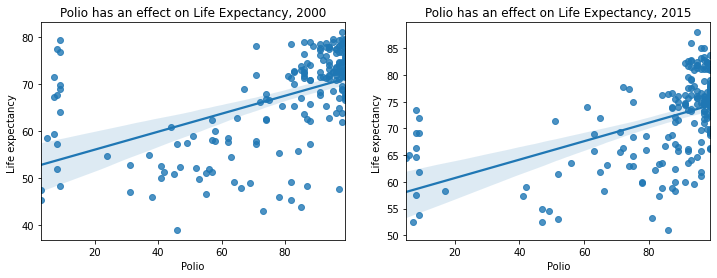

In [54]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=[12,4])
sns.regplot(data=data[data.Year == 2000], x="Polio", y="Life expectancy ", ax=ax1).set_title("Polio has an effect on Life Expectancy, 2000");
sns.regplot(data=data[data.Year == 2015], x="Polio", y="Life expectancy ", ax=ax2).set_title("Polio has an effect on Life Expectancy, 2015");

There is a correlation between Polio and Life expectancy

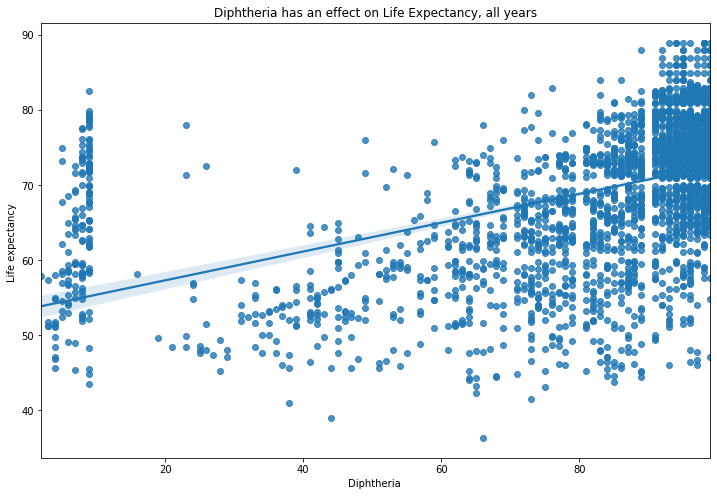

In [55]:
sns.regplot(data=data, x="Diphtheria ", y= "Life expectancy ").set_title("Diphtheria has an effect on Life Expectancy, all years");

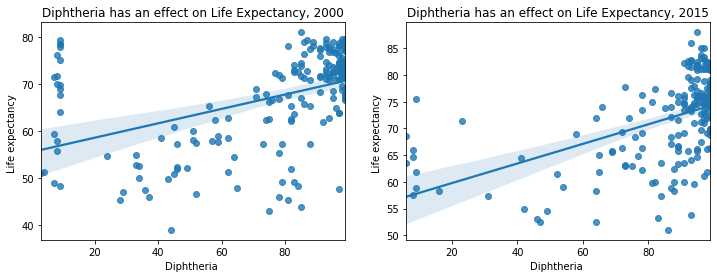

In [56]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=[12,4])
sns.regplot(data=data[data.Year == 2000], x="Diphtheria ", y="Life expectancy ", ax=ax1).set_title("Diphtheria has an effect on Life Expectancy, 2000");
sns.regplot(data=data[data.Year == 2015], x="Diphtheria ", y="Life expectancy ", ax=ax2).set_title("Diphtheria has an effect on Life Expectancy, 2015");

There is a positive correlation between Diptheria vaccine and Life expectance from 2000-2015 years

## 6. Alcohol and Life Expectancy

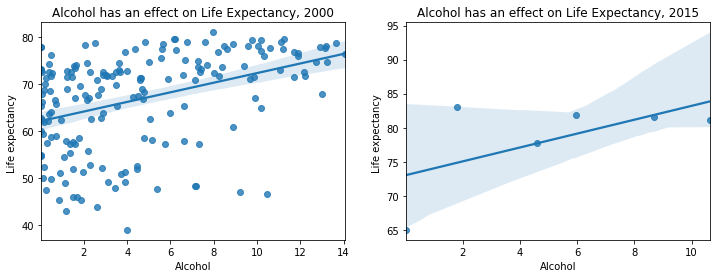

In [57]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=[12,4])
sns.regplot(data=data[data.Year == 2000], x="Alcohol", y="Life expectancy ", ax=ax1).set_title("Alcohol has an effect on Life Expectancy, 2000");
sns.regplot(data=data[data.Year == 2015], x="Alcohol", y="Life expectancy ", ax=ax2).set_title("Alcohol has an effect on Life Expectancy, 2015");

#sns.FacetGrid(data=data, col="Year", col_wrap=4, height=15)
#g.map_dataframe(sns.regplot, x="Alcohol", y="Life expectancy ")

There is a  positive correlation between consumption of Alcohol and Life Expectancy 

## 7. Total Expenditure & Life Expectancy for 2000

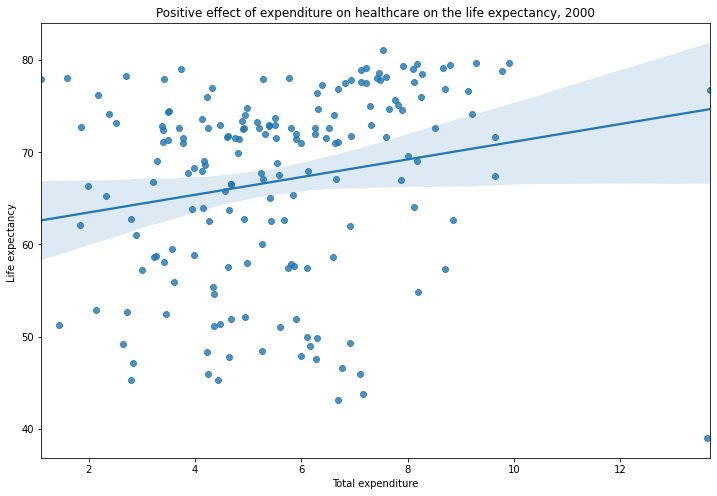

In [23]:
sns.regplot(data=data[data.Year == 2000], x="Total expenditure", y="Life expectancy ").set_title("Positive effect of expenditure on healthcare on the life expectancy, 2000");


According to the graphs, more money the country spend for healthcare, they extend the life expectancy

## 8. Infant Mortality & Life Expectancy


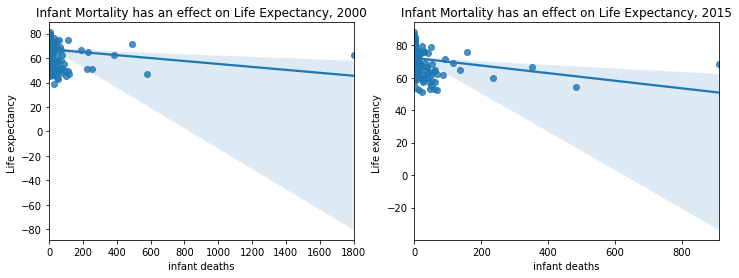

In [58]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=[12,4])
sns.regplot(data=data[data.Year == 2000], x="infant deaths", y="Life expectancy ", ax=ax1).set_title("Infant Mortality has an effect on Life Expectancy, 2000");
sns.regplot(data=data[data.Year == 2015], x="infant deaths", y="Life expectancy ", ax=ax2).set_title("Infant Mortality has an effect on Life Expectancy, 2015");

Infant Deaths have a  slight correlation, More children die, less life expectancy

## 8. Adult Mortality & Life Expectancy


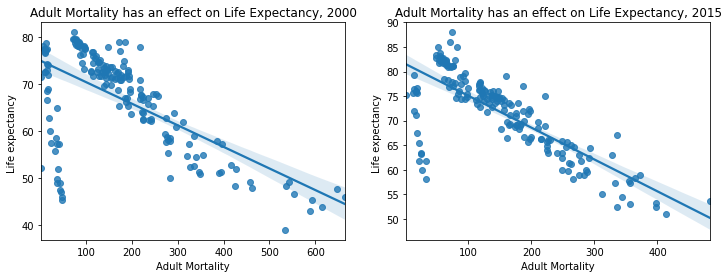

In [59]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=[12,4])
sns.regplot(data=data[data.Year == 2000], x="Adult Mortality", y="Life expectancy ", ax=ax1).set_title("Adult Mortality has an effect on Life Expectancy, 2000");
sns.regplot(data=data[data.Year == 2015], x="Adult Mortality", y="Life expectancy ", ax=ax2).set_title("Adult Mortality has an effect on Life Expectancy, 2015");

More people die, less life expectancy

# Country-View

## What is the long living country?

In [24]:
top_life_exp_2000=(data[data.Year==2000]
.groupby("Country")
 ["Country", "Life expectancy ", "Year"]
 .median()
 .sort_values("Life expectancy ", ascending=False)
 .head(10)
)

top_life_exp_2015=(data[data.Year==2015]
.groupby("Country")
 ["Country", "Life expectancy ", "Year"]
 .mean()
 .sort_values("Life expectancy ", ascending=False)
 .head(10)
)
bottom_life_exp_2000=(
    data[data.Year==2000]
    .groupby("Country")
    ["Country", "Life expectancy ", "Year"]
    .median()
    .sort_values("Life expectancy ", ascending=True)
    .head(10)
)

bottom_life_exp_2015=(
    data[data.Year==2015]
    .groupby("Country")
    ["Country", "Life expectancy ", "Year"]
    .mean()
    .sort_values("Life expectancy ", ascending=True)
    .head(10)
)

plot_long_2000 = top_life_exp_2000.hvplot.bar(x="Country", y="Life expectancy ", stacked=True, rot=45, title="Countries with the longest and shortest life expectancy, 2000")
plot_long_2015 = top_life_exp_2015.hvplot.bar(x="Country", y="Life expectancy ", stacked=True, rot=45, title="Countries with the longest and shortest life expectancy, 2015")

plot_short_2000= bottom_life_exp_2000.hvplot.bar(x="Country", y="Life expectancy ", stacked=True, rot=45)
plot_short_2015= bottom_life_exp_2015.hvplot.bar(x="Country", y="Life expectancy ", stacked=True, rot=45)

plot_long_2000*plot_short_2000

<ipython-input-24-8541427d29f4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_life_exp_2000=(data[data.Year==2000]
<ipython-input-24-8541427d29f4>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_life_exp_2015=(data[data.Year==2015]
<ipython-input-24-8541427d29f4>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data.Year==2000]
<ipython-input-24-8541427d29f4>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data.Year==2015]


:Overlay
   .Bars.I  :Bars   [Country]   (Life expectancy )
   .Bars.II :Bars   [Country]   (Life expectancy )

In 2000, the country with the longest life expectancy was Japan (81), and the shortest life expectancy was in Siera Leone (39)

In [25]:
plot_long_2015*plot_short_2015


:Overlay
   .Bars.I  :Bars   [Country]   (Life expectancy )
   .Bars.II :Bars   [Country]   (Life expectancy )

In 2015, the country with the longest life expectancy was Slovenia (88), and the shortest life expectancy was in Siera Leone (51)

## Status

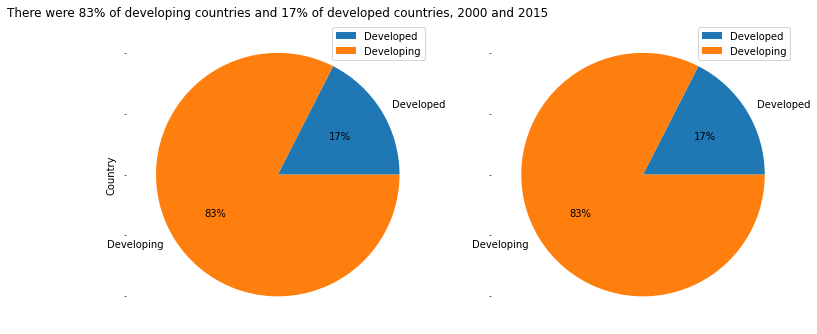

In [60]:
status_2000=(data[data.Year==2000]
.groupby("Status")
 [["Country"]]
 .count()
)

status_2015=(data[data.Year==2015]
             .groupby("Status")
             [["Country"]]
             .count()
            )


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
status_2000.plot.pie(y="Country", autopct='%1.0f%%', ax=ax1, figsize=(12,7)).set_title("There were 83% of developing countries and 17% of developed countries, 2000 and 2015");
status_2015.plot.pie(y="Country", autopct='%1.0f%%', ax=ax2, figsize=(12,7));

 According to the pie chart, the number of developing or developed countries have not changed from 2000 - 2015. There are 83% of Developing countries and 17% of Developed Countries

In [27]:
data["Compare Status"]=data.Status == data.groupby("Country").Status.shift()

In [28]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Compare Status
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,...,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5,False
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,...,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9,True
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,...,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2,True
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,...,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5,True
11,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,...,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1,True
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8,True
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4,True
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3,True


In [29]:
mask=(data["Compare Status"]==False) & (data["Year"]!=2000)

In [30]:
data[mask]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Compare Status
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,False
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7,False
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,NaN,False
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,False
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6,False
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,False
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2,False
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4,False
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1,False
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,NaN,False


Those Countries are only in 2013.

Result: None of the countries made a change in a status.

# Conclusion
- In 2015 the country with the longest life expectancy (88 years old) was Slovenia
- In 2o15 the country with the shortest life expectancy(51 years old) was Sierra Leone

- Various factors affect life expectancy:
    - Income Composition of Resources
    - Schooling
    -  Alcohol 
    - Polio & Diphtheria
    - Total Expenditure
    - Infant Mortality
    - Adult Mortality
    
- There are 83% of developing countries and 17% of developed countries both for 2000 and 2015 years
- There was no shift in the levels of the country. For 15 years, there was no country that shifted from being developing country to being developed
    